In [0]:
from torch import nn, optim
import torch
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [11]:
torch.manual_seed(1)

In [0]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
  def __init__(self):
    self.x = torch.zeros(20,2)
    self.x[:,0] = torch.arange(-1,1,0.1)
    self.x[:,1] = torch.arange(-1,1,0.1)
    self.w = torch.tensor([[1.0,-1.0],[1.0,3.0]])
    self.b = torch.tensor([[1.0,-1.0]])
    self.f = torch.mm(self.x, self.w)+self.b

    self.y = self.f + 0.001 * torch.randn((self.x.shape[0],1))
    self.len = self.x.shape[0]
  
  def __getitem__(self, index):
    return self.x[index], self.y[index]
  
  def __len__(self):
    return self.len

In [0]:
data_set = Data()

In [0]:
class linear_regression(nn.Module):
  def __init__(self, input_size, output_size):
    super(linear_regression, self).__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    yhat = self.linear(x)
    return yhat

In [0]:
model = linear_regression(2,2)

In [0]:
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [0]:
criterion = nn.MSELoss()

In [0]:
train_loader=DataLoader(dataset=data_set, batch_size=5)

In [0]:
LOSS = []

epochs=100

for epoch in range(epochs):
   for x,y in train_loader:
      yhat = model(x)
      loss = criterion(yhat, y)
      LOSS.append(loss.item())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      

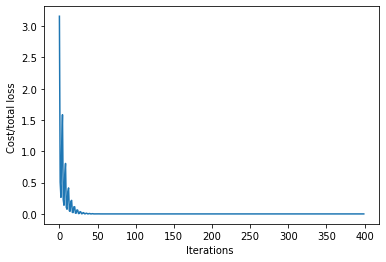

In [33]:
plt.plot(LOSS)
plt.xlabel("Iterations ")
plt.ylabel("Cost/total loss ")
plt.show()